# Calculate zonal-level percent snow coverage from IMS
- Zones: Canada, Ecozones, Tiles

In [1]:
import geopandas as gpd
import pandas as pd

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Modelling/Utilities')
import General_Utils as gutil

In [2]:
from dask.distributed import LocalCluster

cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:58406,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:58485,Total threads: 10
Dashboard: http://127.0.0.1:58492/status,Memory: 0 B
Nanny: tcp://127.0.0.1:58409,


2025-02-04 11:23:50,709 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,722 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,728 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,730 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,740 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,743 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,753 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,759 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,765 - distributed.nanny - WARNING - Restarting worker
2025-02-04 11:23:50,770 - distributed.nanny - WARNING - Restarting worker


# Inputs

In [3]:
condition = [3,4] # Ice = 3, Snow = 4
valid = [1,2,3,4] # 0 = outside area, rest of values are valid

## Canada

In [4]:
canada = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\Boundary\CanVec\CanVec_Dissolve3979_Buffer10km_Erase_Edit_FillHoles.shp"
canada = gpd.read_file(canada, engine = 'pyogrio').set_index('ctry_en')
canada

,ORIG_FID,geometry
ctry_en,,
Canada,0,"MULTIPOLYGON (((2720695.69 188052.83, 2720041...."


In [5]:
canada.crs

<Projected CRS: EPSG:3979>
Name: NAD83(CSRS) / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Ecozones

In [6]:
ecozones = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\Ecozones\ecozones_dissolve.shp"
ecozones = gpd.read_file(ecozones, engine = 'pyogrio').to_crs(canada.crs).set_index('ZONE_NAME')
ecozones

,geometry
ZONE_NAME,
Arctic Cordillera,"MULTIPOLYGON (((282903.717 3475204.333, 282456..."
Atlantic Maritime,"MULTIPOLYGON (((2414121.916 484766.775, 241125..."
Boreal Cordillera,"POLYGON ((-1946722.061 2448747.172, -1946317.8..."
Boreal Plains,"MULTIPOLYGON (((-1358002.962 377361.066, -1358..."
Boreal Shield,"POLYGON ((-901333.69 1179355.741, -900992.754 ..."
Hudson Plains,"POLYGON ((9641.985 837089.403, 10374.816 83791..."
Mixedwood Plains,"POLYGON ((1848258.909 217008.353, 1851713.909 ..."
Montane Cordillera,"POLYGON ((-2019673.932 1474723.647, -2019400.9..."
Northern Arctic,"POLYGON ((345131.862 3057676.332, 345599.581 3..."


In [7]:
ecozones.crs

<Projected CRS: EPSG:3979>
Name: NAD83(CSRS) / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Tiles

In [8]:
tiles = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\TileSystems\60km\canadaFishnet_CanVec_60km_clip.shp"
tiles = gpd.read_file(tiles, engine = 'pyogrio').drop(columns = ['PERCENTAGE', 'Majority_Z'])
tiles

,geometry
0,"POLYGON ((1008972.823 -693717.864, 1007578.707..."
1,"POLYGON ((1055101.994 -724723.511, 1018145.335..."
2,"POLYGON ((1068972.823 -721970.695, 1068972.823..."
3,"POLYGON ((1128972.823 -672417.924, 1128972.823..."
4,"POLYGON ((1006314.847 -664723.511, 1006713.578..."
...,...
3386,"POLYGON ((288972.823 3775276.489, 288972.823 3..."
3387,"POLYGON ((348972.823 3775276.489, 348972.823 3..."
3388,"POLYGON ((408972.823 3775276.489, 408972.823 3..."
3389,"POLYGON ((468972.823 3775276.489, 468972.823 3..."


In [9]:
tiles.crs

<Projected CRS: EPSG:3979>
Name: NAD83(CSRS) / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# 2018

## Prepare IMS

In [10]:
# year = 2018
# path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
# path

In [11]:
# %%time
# ims = pputil.uploadNC(path, chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# ims

In [12]:
# ims.rio.crs

## Get % snow by time-step for zones

### Canada

In [13]:
# %%time
# canada_df_18 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
# canada_df_18

In [14]:
# canada_df_18.plot()

### Ecozones

In [15]:
# %%time
# ecozones_df_18 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
# ecozones_df_18

In [16]:
# zone = 'Arctic Cordillera'
# ecozones_df_18[zone].plot()

### Tiles

In [17]:
# %%time
# tiles_df_18 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
# tiles_df_18

In [18]:
# zone = 989
# tiles_df_18[zone].plot()

# 2019

## Prepare IMS

In [19]:
# year = 2019
# path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
# path

In [20]:
# %%time
# ims = pputil.uploadNC(path, chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# ims

In [21]:
# ims.rio.crs

## Get % snow by time-step for zones

### Canada

In [22]:
# %%time
# canada_df_19 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
# canada_df_19

In [23]:
# canada_df_19.plot()

### Ecozones

In [24]:
# %%time
# ecozones_df_19 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
# ecozones_df_19

In [25]:
# zone = 'Arctic Cordillera'
# ecozones_df_19[zone].plot()

### Tiles

In [26]:
# %%time
# tiles_df_19 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
# tiles_df_19

In [27]:
# zone = 989
# tiles_df_19[zone].plot()

# 2020

## Prepare IMS

In [28]:
# year = 2020
# path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
# path

In [29]:
# %%time
# ims = pputil.uploadNC(path, chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# ims

In [30]:
# ims.rio.crs

## Get % snow by time-step for zones

### Canada

In [31]:
# %%time
# canada_df_20 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
# canada_df_20

In [32]:
# canada_df_20.plot()

### Ecozones

In [33]:
# %%time
# ecozones_df_20 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
# ecozones_df_20

In [34]:
# zone = 'Arctic Cordillera'
# ecozones_df_20[zone].plot()

### Tiles

In [35]:
# %%time
# tiles_df_20 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
# tiles_df_20

In [36]:
# zone = 989
# tiles_df_20[zone].plot()

# 2021

## Prepare IMS

In [37]:
# year = 2021
# path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
# path

In [38]:
# %%time
# ims = pputil.uploadNC(path, chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# ims

In [39]:
# ims.rio.crs

## Get % snow by time-step for zones

### Canada

In [40]:
# %%time
# canada_df_21 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
# canada_df_21

In [41]:
# canada_df_21.plot()

### Ecozones

In [42]:
# %%time
# ecozones_df_21 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
# ecozones_df_21

In [43]:
# zone = 'Arctic Cordillera'
# ecozones_df_21[zone].plot()

### Tiles

In [44]:
# %%time
# tiles_df_21 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
# tiles_df_21

In [45]:
# zone = 989
# tiles_df_21[zone].plot()

# 2022

## Prepare IMS

In [46]:
# year = 2022
# path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
# path

In [47]:
# %%time
# ims = pputil.uploadNC(path, chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# ims

In [48]:
# ims.rio.crs

## Get % snow by time-step for zones

### Canada

In [49]:
# %%time
# canada_df_22 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
# canada_df_22

In [50]:
# canada_df_22.plot()

### Ecozones

In [51]:
# %%time
# ecozones_df_22 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
# ecozones_df_22

In [52]:
# zone = 'Arctic Cordillera'
# ecozones_df_22[zone].plot()

### Tiles

In [53]:
# %%time
# tiles_df_22 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
# tiles_df_22

In [54]:
# zone = 989
# tiles_df_22[zone].plot()

# 2023

## Prepare IMS

In [79]:
# year = 2023
# path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
# path

In [80]:
# %%time
# ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
# ims

In [81]:
# ims.rio.crs

## Get % snow by time-step for zones

### Canada

In [58]:
# %%time
# canada_df_23 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
# canada_df_23

In [59]:
# canada_df_23.plot()

### Ecozones

In [60]:
# %%time
# ecozones_df_23 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
# ecozones_df_23

In [61]:
# zone = 'Arctic Cordillera'
# ecozones_df_23[zone].plot()

### Tiles

In [62]:
# %%time
# tiles_df_23 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
# tiles_df_23

In [63]:
# zone = 989
# tiles_df_23[zone].plot()

# 2024

## Prepare IMS

In [10]:
year = 2024
path = 'D:/Canada/IMS/IMS_'+ str(year) + '.nc'
path

'D:/Canada/IMS/IMS_2024.nc'

In [11]:
%%time
ims = pputil.uploadNC(path, type = 'dataarray', chunks = {'time': 1, 'band': -1, 'x': -1, 'y': -1})
ims

CPU times: total: 15.6 ms
Wall time: 1.07 s


<xarray.DataArray (time: 366, y: 4568, x: 5372)> Size: 9GB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(366, 4568, 5372), dtype=uint8, chunksize=(1, 4568, 5372), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 43kB -2.351e+06 -2.35e+06 ... 3.019e+06 3.02e+06
  * y            (y) float64 37kB 3.843e+06 3.842e+06 ... -7.229e+05 -7.239e+05
  * time         (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
    variable     <U18 72B ...
    spatial_ref  int64 8B ...
Attributes: (12/50)
    _FillValue:                 0
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NESDIS Interactive Multisensor Snow and ...
    summary:                    This file contains a map of snow cover and ic...
    keywords:                   EARTH SCIENCE > CRYOSPHERE > SEA ICE > ICE EX...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Ke...
    ...                         ...
    metadata_link:              https://nsidc.org/data/G02156
    naming_authority:           org.nsidc
    references:                 Ramsay, B. H. (1998). The interactive multise...
    history:                    01 January 2024 00:35Z: NetCDF file generated...
    source:                     Analysts at the United States National Ice Ce...
    comment:                    The IMS product has changed versions and reso...

In [12]:
ims.rio.crs

CRS.from_wkt('PROJCS["NAD83(CSRS) / Canada Atlas Lambert",GEOGCS["NAD83(CSRS)",DATUM["NAD83_Canadian_Spatial_Reference_System",SPHEROID["GRS 1980",6378137,298.257222101],AUTHORITY["EPSG","6140"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4617"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-95],PARAMETER["standard_parallel_1",49],PARAMETER["standard_parallel_2",77],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3979"]]')

## Get % snow by time-step for zones

### Canada

In [13]:
%%time
canada_df_24 = gutil.cubeZonal(ims, canada, condition = condition, valid = valid)
canada_df_24

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).


C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 187.23 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Calculated number of valid pixels for all zones (pixels = 10544145, zones = 1).
Calculated number of pixels that met condition for all zones (1) and time-steps (366).


C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 187.90 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 25.6 s
Wall time: 1min 19s


ctry_en,Canada
time,
2024-01-01,86.808508
2024-01-02,87.670598
2024-01-03,87.616246
2024-01-04,87.311176
2024-01-05,93.301363
...,...
2024-12-27,95.109011
2024-12-28,94.962522
2024-12-29,94.829111


<Axes: xlabel='time'>

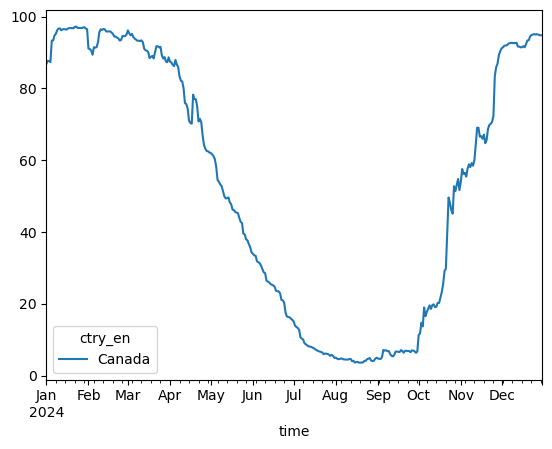

In [14]:
canada_df_24.plot()

### Ecozones

In [15]:
%%time
ecozones_df_24 = gutil.cubeZonal(ims, ecozones, condition = condition, valid = valid)
ecozones_df_24

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).


C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 187.23 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Calculated number of valid pixels for all zones (pixels = 10526564, zones = 15).
Calculated number of pixels that met condition for all zones (15) and time-steps (366).


C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 187.90 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 21.9 s
Wall time: 1min 7s


ZONE_NAME,Arctic Cordillera,Atlantic Maritime,Boreal Cordillera,Boreal Plains,Boreal Shield,Hudson Plains,Mixedwood Plains,Montane Cordillera,Northern Arctic,Pacific Maritime,Prairies,Southern Arctic,Taiga Cordillera,Taiga Plains,Taiga Shield
time,,,,,,,,,,,,,,,
2024-01-01,98.849889,73.025975,99.171610,53.568706,89.009617,100.000000,9.602734,83.244827,99.818427,45.257498,37.206635,97.749093,99.996418,90.831192,99.244857
2024-01-02,98.884307,75.512773,97.666386,56.676297,89.413067,100.000000,31.790399,80.582303,99.991324,45.172602,47.597586,98.248982,99.996418,87.927115,99.039793
2024-01-03,98.928267,72.481147,97.666386,56.676297,89.413067,100.000000,29.213030,80.582303,99.997779,45.172602,49.880428,97.870875,99.996418,87.927115,98.983009
2024-01-04,99.104106,72.481147,97.666386,55.893480,89.422836,100.000000,29.213030,79.811060,99.997779,45.172602,43.212834,97.870875,99.996418,87.927115,99.497936
2024-01-05,99.504856,73.126522,99.986059,92.900979,93.367577,100.000000,47.611115,84.740234,100.000000,45.172602,72.178865,98.844155,99.996418,99.998710,99.758907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,97.409099,78.140260,99.988982,99.974079,92.563171,99.001970,65.241618,96.187099,99.408390,57.571967,94.659974,95.950703,100.000000,99.999839,97.679397
2024-12-28,97.495996,78.270816,99.988982,99.974079,92.645550,99.005271,57.742627,96.189191,99.288477,57.571967,93.529196,96.166471,100.000000,99.999839,97.757374
2024-12-29,97.676265,78.270816,99.988982,99.775817,92.645550,98.795814,51.127208,96.776934,99.167015,57.571967,93.181231,96.199674,100.000000,99.999839,97.768263


<Axes: xlabel='time'>

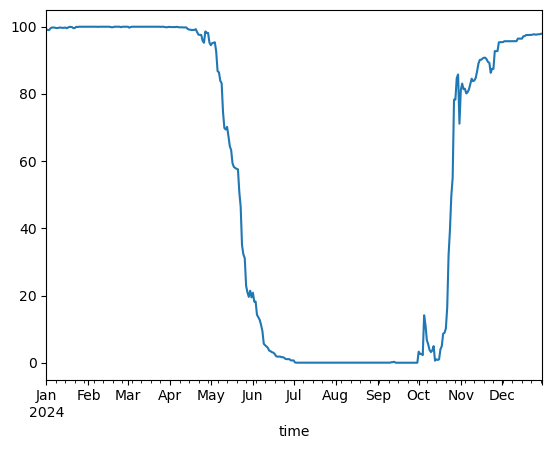

In [16]:
zone = 'Taiga Shield'
ecozones_df_24[zone].plot()

### Tiles

In [17]:
%%time
tiles_df_24 = gutil.cubeZonal(ims, tiles, condition = condition, valid = valid)
tiles_df_24

Converted cube to boolean (1 = Meets condition, 0 = Does not meet condition).


C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 187.27 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Calculated number of valid pixels for all zones (pixels = 10544145, zones = 3391).
Calculated number of pixels that met condition for all zones (3391) and time-steps (366).


C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 188.11 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Created dataframe where each column is % pixels meeting condition across all time-steps for each zone.
CPU times: total: 22.3 s
Wall time: 1min 9s


,0,1,2,3,4,5,6,7,8,9,...,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
time,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-01-02,0.0,0.000000,0.000000,0.0,0.0,0.000000,24.222222,0.00000,0.0,19.009585,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-01-03,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-01-04,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-01-05,0.0,0.000000,0.000000,0.0,0.0,0.000000,15.861111,0.20008,0.0,53.274760,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,10.0,45.195388,1.206497,0.0,0.0,78.601204,65.861111,0.20008,0.0,68.610224,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-12-28,0.0,0.000000,0.000000,0.0,0.0,21.167207,0.000000,0.00000,0.0,29.153355,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-12-29,0.0,0.000000,0.000000,0.0,0.0,21.167207,0.000000,0.00000,0.0,0.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


<Axes: xlabel='time'>

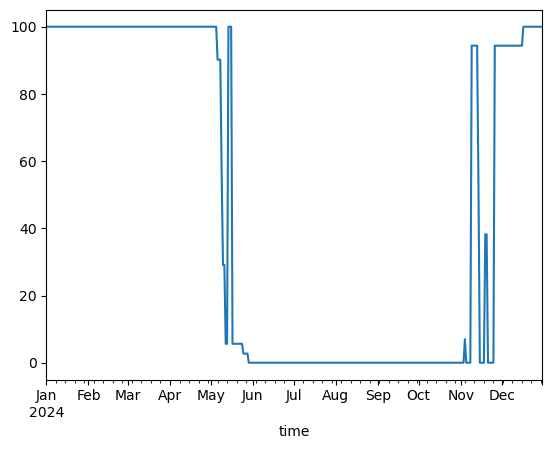

In [18]:
zone = 904
tiles_df_24[zone].plot()

# Merge Dataframes

## Canada

In [67]:
canada_df_1823 = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\IMS_pSnow_Canada.csv")
canada_df_1823 = canada_df_1823.set_index('time')
canada_df_1823.index = pd.to_datetime(canada_df_1823.index)
canada_df_1823

,Canada
time,
2018-01-01,97.071850
2018-01-02,97.162224
2018-01-03,97.035890
2018-01-04,97.127020
2018-01-05,97.106850
...,...
2023-12-27,85.008630
2023-12-28,84.288605
2023-12-29,83.934860


In [69]:
%%time
#canada_df = pd.concat((canada_df_18, canada_df_19, canada_df_20, canada_df_21, canada_df_22, canada_df_23))
canada_df = pd.concat((canada_df_1823, canada_df_24))
canada_df

CPU times: total: 0 ns
Wall time: 1 ms


,Canada
time,
2018-01-01,97.071850
2018-01-02,97.162224
2018-01-03,97.035890
2018-01-04,97.127020
2018-01-05,97.106850
...,...
2024-12-27,95.109011
2024-12-28,94.962522
2024-12-29,94.829111


<Axes: xlabel='time'>

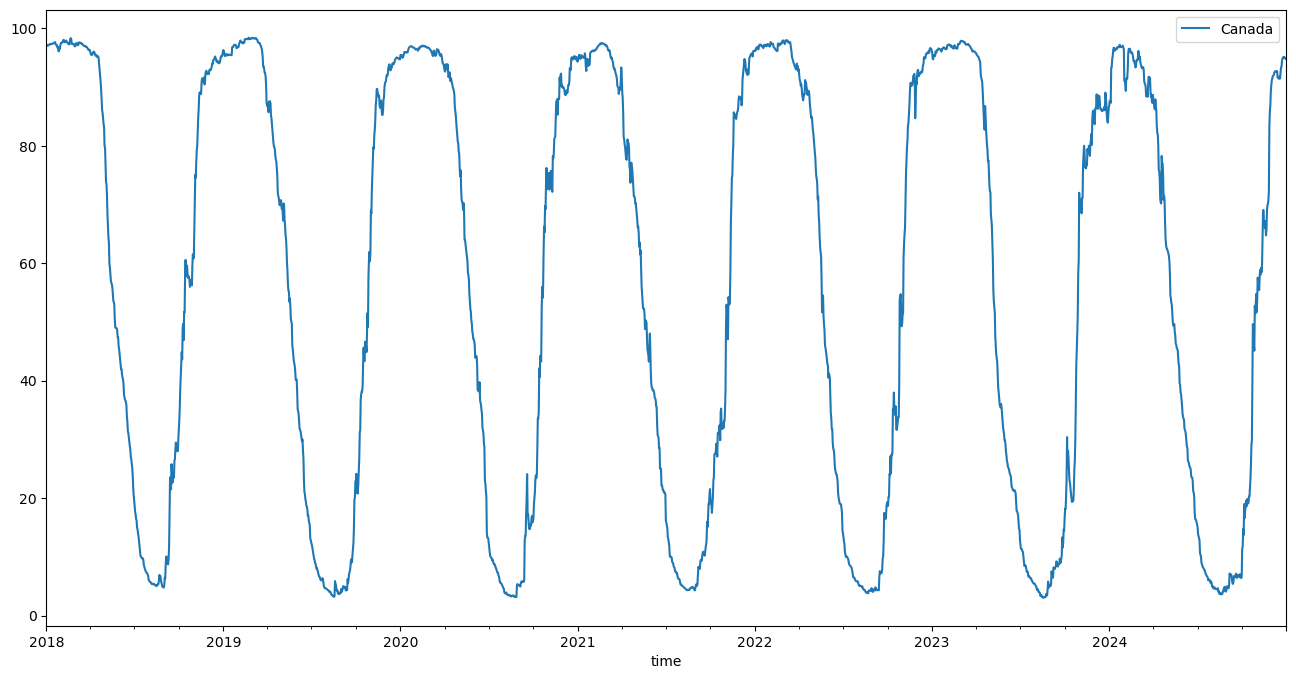

In [71]:
canada_df.plot(figsize = (16, 8))

In [72]:
canada_df.to_csv('IMS_pSnow_Canada.csv')

## Ecozone

In [73]:
ecozones_df_1823 = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\IMS_pSnow_CanadaEcozones.csv")
ecozones_df_1823 = ecozones_df_1823.set_index('time')
ecozones_df_1823.index = pd.to_datetime(ecozones_df_1823.index)
ecozones_df_1823

,Arctic Cordillera,Atlantic Maritime,Boreal Cordillera,Boreal Plains,Boreal Shield,Hudson Plains,Mixedwood Plains,Montane Cordillera,Northern Arctic,Pacific Maritime,Prairies,Southern Arctic,Taiga Cordillera,Taiga Plains,Taiga Shield
time,,,,,,,,,,,,,,,
2018-01-01,99.811890,77.187390,99.99730,99.989075,95.093630,99.987816,79.731290,98.440770,99.99024,63.977737,99.997826,99.99438,100.00000,99.99871,99.361200
2018-01-02,99.811890,80.183556,99.99730,99.989075,95.167500,99.987816,79.661930,98.440770,99.99024,64.187320,99.997826,99.99438,100.00000,99.99871,99.361200
2018-01-03,99.811890,75.163190,99.99730,99.989075,95.167560,99.987816,79.661930,98.605030,99.99024,63.684906,99.997826,99.99438,100.00000,99.99871,99.361200
2018-01-04,99.870850,77.527230,99.99730,99.989075,95.142720,99.987816,79.661930,98.605030,99.99024,63.684906,99.997826,99.99438,100.00000,99.99871,99.626410
2018-01-05,99.870850,77.527230,99.99730,99.566060,95.143080,99.987816,80.164540,98.605030,99.99024,63.684906,99.997826,99.99438,100.00000,99.99871,99.626410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,98.696540,2.283365,99.98606,60.090458,83.519714,99.131960,2.218596,87.109825,99.62694,45.257500,44.064938,97.10374,99.99642,96.93680,98.388720
2023-12-28,98.725845,2.283365,99.98606,59.441590,80.384060,99.131960,0.708450,87.109825,99.63587,45.257500,42.100735,97.29268,99.99642,96.93680,98.390840
2023-12-29,98.144150,2.283365,99.98606,59.372370,80.249630,99.131960,0.708450,86.888880,99.55237,45.257500,35.959870,97.09238,99.99642,96.93680,98.403114


In [74]:
%%time
#ecozones_df = pd.concat((ecozones_df_18, ecozones_df_19, ecozones_df_20, ecozones_df_21, ecozones_df_22, ecozones_df_23))
ecozones_df = pd.concat((ecozones_df_1823, ecozones_df_24))
ecozones_df

CPU times: total: 0 ns
Wall time: 1.79 ms


,Arctic Cordillera,Atlantic Maritime,Boreal Cordillera,Boreal Plains,Boreal Shield,Hudson Plains,Mixedwood Plains,Montane Cordillera,Northern Arctic,Pacific Maritime,Prairies,Southern Arctic,Taiga Cordillera,Taiga Plains,Taiga Shield
time,,,,,,,,,,,,,,,
2018-01-01,99.811890,77.187390,99.997300,99.989075,95.093630,99.987816,79.731290,98.440770,99.990240,63.977737,99.997826,99.994380,100.0,99.998710,99.361200
2018-01-02,99.811890,80.183556,99.997300,99.989075,95.167500,99.987816,79.661930,98.440770,99.990240,64.187320,99.997826,99.994380,100.0,99.998710,99.361200
2018-01-03,99.811890,75.163190,99.997300,99.989075,95.167560,99.987816,79.661930,98.605030,99.990240,63.684906,99.997826,99.994380,100.0,99.998710,99.361200
2018-01-04,99.870850,77.527230,99.997300,99.989075,95.142720,99.987816,79.661930,98.605030,99.990240,63.684906,99.997826,99.994380,100.0,99.998710,99.626410
2018-01-05,99.870850,77.527230,99.997300,99.566060,95.143080,99.987816,80.164540,98.605030,99.990240,63.684906,99.997826,99.994380,100.0,99.998710,99.626410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,97.409099,78.140260,99.988982,99.974079,92.563171,99.001970,65.241618,96.187099,99.408390,57.571967,94.659974,95.950703,100.0,99.999839,97.679397
2024-12-28,97.495996,78.270816,99.988982,99.974079,92.645550,99.005271,57.742627,96.189191,99.288477,57.571967,93.529196,96.166471,100.0,99.999839,97.757374
2024-12-29,97.676265,78.270816,99.988982,99.775817,92.645550,98.795814,51.127208,96.776934,99.167015,57.571967,93.181231,96.199674,100.0,99.999839,97.768263


<Axes: xlabel='time'>

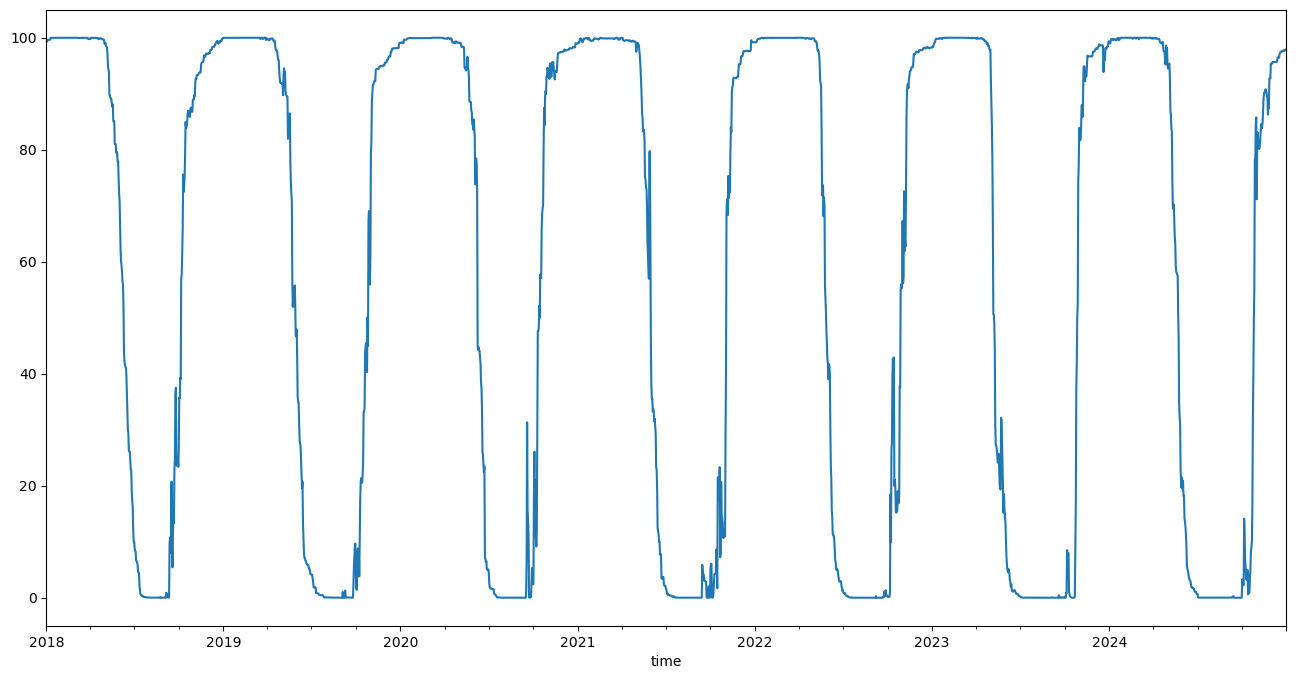

In [89]:
ecozones_df['Taiga Shield'].plot(figsize = (16, 8))

In [90]:
ecozones_df.to_csv('IMS_pSnow_CanadaEcozones.csv')

## Tiles

In [105]:
tiles_df_1823 = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\IMS_pSnow_CanadaTiles60km.csv")
tiles_df_1823 = tiles_df_1823.set_index('time')
tiles_df_1823.index = pd.to_datetime(tiles_df_1823.index)
tiles_df_1823.columns = pd.RangeIndex(start = 0, stop = len(tiles_df_1823.columns), step = 1)
tiles_df_1823

,0,1,2,3,4,5,6,7,8,9,...,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,100.00000,40.928074,0.0,100.0,100.0,75.138885,16.926771,0.338409,95.52715,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-02,100.0,100.00000,40.928074,0.0,100.0,100.0,73.055560,16.926771,0.338409,95.52715,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-03,100.0,100.00000,40.928074,0.0,100.0,100.0,73.055560,16.926771,0.338409,95.52715,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-04,100.0,100.00000,40.928074,0.0,100.0,100.0,73.055560,16.926771,0.338409,95.52715,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-05,100.0,99.10314,95.359630,0.0,100.0,100.0,87.888885,29.171669,3.891709,100.00000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0
2023-12-28,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0
2023-12-29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0


In [106]:
%%time
#tiles_df = pd.concat((tiles_df_18, tiles_df_19, tiles_df_20, tiles_df_21, tiles_df_22, tiles_df_23))
tiles_df = pd.concat((tiles_df_1823, tiles_df_24))
tiles_df

CPU times: total: 141 ms
Wall time: 155 ms


,0,1,2,3,4,5,6,7,8,9,...,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,100.000000,40.928074,0.0,100.0,100.000000,75.138885,16.926771,0.338409,95.527150,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-02,100.0,100.000000,40.928074,0.0,100.0,100.000000,73.055560,16.926771,0.338409,95.527150,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-03,100.0,100.000000,40.928074,0.0,100.0,100.000000,73.055560,16.926771,0.338409,95.527150,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-04,100.0,100.000000,40.928074,0.0,100.0,100.000000,73.055560,16.926771,0.338409,95.527150,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-05,100.0,99.103140,95.359630,0.0,100.0,100.000000,87.888885,29.171669,3.891709,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,10.0,45.195388,1.206497,0.0,0.0,78.601204,65.861111,0.200080,0.000000,68.610224,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0
2024-12-28,0.0,0.000000,0.000000,0.0,0.0,21.167207,0.000000,0.000000,0.000000,29.153355,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0
2024-12-29,0.0,0.000000,0.000000,0.0,0.0,21.167207,0.000000,0.000000,0.000000,0.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00000,100.0


<Axes: xlabel='time'>

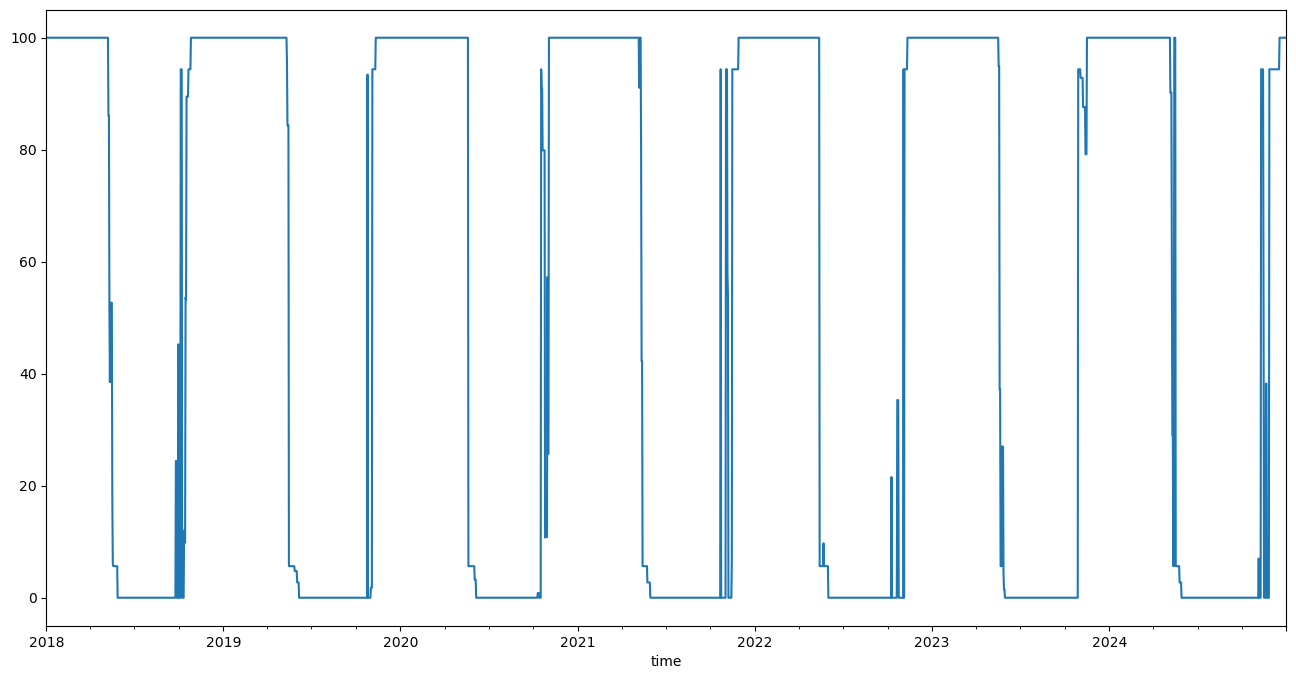

In [112]:
tiles_df[904].plot(figsize = (16, 8))

In [113]:
tiles_df.to_csv('IMS_pSnow_CanadaTiles60km.csv')